#  Анализ данных Яндекс Недвижимости

**Цель исследования** — провести исследовательский анализ данных:
1. Изучить следующие параметры: площадь, цена, число комнат, высота потолков. 
2. Изучите время продажи квартиры. 
3. Изучить какие факторы больше всего влияют на стоимость квартиры.
4. Выделить сегмент квартир в центре. Проанализировать эту территорию.

**Ход исследования**

Данные о недвижимости получены из файла `/datasets/real_estate_data.csv.`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Данные будут проверны  на ошибки и оценено их влияние на исследование. Затем, на этапе предобработки исправляются самые критичные ошибки данных.

На основе данных считаются и добавляются новые столбцы.
 
Таким образом, исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Добавление новых столцов.
 4. Исследовательский анализ

## 1 Обзор данных

Первое представление о данных по недвижимости.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# импорт библиотеки pandas

In [2]:
# data = pd.read_csv('real_estate_data.csv', sep='\t')
data = pd.read_csv('real_estate_data.csv',sep='\t')
 # чтение файла с данными и сохранение в data

In [3]:
data.head(10)
# получение первых 10 строк таблицы data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.tail()
#получение последние 5 строк.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
round(data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.86,5.68,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6541548.77,10887013.27,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,60.35,35.65,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.07,1.08,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.77,1.26,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,10.67,6.60,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,34.46,22.03,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.89,4.89,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,10.57,5.91,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.15,1.07,0.0,0.00,1.00,2.0,5.0


In [6]:
data.info()
# получение общей информации о данных в таблице data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца. Тип данных в столбцах различается. Присутствует — `float64`(14), `int64`(3), `object`(3), ` bool`(2).

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

В названиях колонок выявлено нарушение стиля.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Выводы**

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Предварительно можно утверждать, что, данных достаточно для исследовательского анализа. Но встречаются пропуски в данных, некоторые из котрох можно исправить.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## 2 Предобработка данных

### 2.1 Исправление названий столбцов

In [7]:
data = data.rename(
    columns= {
        'cityCenters_nearest' : 'city_centers_nearest', 
        'ponds_around3000' : 'ponds_around_3km', 
        'parks_around3000' : 'parks_around_3km'
    }
)
# переименование столбцов

In [8]:
data.columns 
# проверка результатов - перечень названий столбцов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3km', 'parks_nearest', 'ponds_around_3km',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### 2.2 Пропуски значений

In [9]:
(data
 .isna()
 .sum()
 .sort_values(ascending=False)
)
# сортируем пропуски по количеству для удобства

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around_3km         5518
parks_around_3km         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [10]:
columns = ['balcony', 'parks_around_3km', 'ponds_around_3km', 'is_apartment']
for a in columns:
    if a == 'is_apartment':
        data[a] = data[a].fillna(False)
    else:
        data[a] = data[a].fillna(0)
# заполняем с помощью цикла пропуски в некоторых столлбцах

In [11]:
(data
 .isna()
 .sum()
 .sort_values(ascending=False)
)
# проверка результатов

parks_nearest           15620
ponds_nearest           14589
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
balcony                     0
ponds_around_3km            0
parks_around_3km            0
total_images                0
last_price                  0
studio                      0
is_apartment                0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

### 2.3 Перевод данных

In [12]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [13]:
data['first_day_exposition'] = pd.to_datetime( data['first_day_exposition'], format='%Y.%m.%dT') 
# первод времени в формат, подходящий для работы с датами

In [14]:
data.head()
#проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В столбце `first_day_exposition`  изменен тип данных c `object` на  `datetime64`. 

Это позволит выполнять с данными необходимые операции.

In [15]:
price = []
for a in data['last_price']:
    price.append(round(a / 1000000, 1))
data['last_price'] = price
# с помощью цикла меняем единицу измерения с единиц на млн для более удобного построения графиков при дальнейшем анализе

In [16]:
data.head()
#проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3.4,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5.2,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64.9,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### 2.4 Проверка на наличие дупликатов

In [17]:
data.duplicated().sum()

0

**Выводы**

В ходе предобратки:

- исправлен формат времени,
- исправлен формат запмси цены,
- дубликаты не обнаружены.
- заполнены некоторые пропуски
- исправлены названия столбцов

Без данных проблем исследование станет более точным.


## 3 Добавление столбцов

### 3.1 Цена квадратного метра

In [18]:
data['price_m2'] =round((data['last_price'] / data['total_area']),3)
# рассчет кв м 

In [19]:
data.head()
# Проверка 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,price_m2
0,20,13.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.120
1,7,3.4,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.084
2,10,5.2,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.093
3,0,64.9,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.408
4,2,10.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.100


### 3.2 День недели, месяц и год публикации объявления

In [20]:
data['day'] = data['first_day_exposition'].dt.weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
# создание новых столбцов с днем месяцем и годом

In [21]:
data.head()
#проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,price_m2,day,month,year
0,20,13.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,0.120,3,3,2019
1,7,3.4,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,0.084,1,12,2018
2,10,5.2,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,0.093,3,8,2015
3,0,64.9,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,0.408,4,7,2015
4,2,10.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,0.100,1,6,2018


### 3.3 Этаж квартиры

In [22]:
def category(data):
    if data['floor'] == data['floors_total']:
        return 'последний'
    elif data['floor'] == 1.0:
        return'первый' 
    else:   
        return 'другой'


In [23]:
data['floor_category'] = data.apply(category, axis=1)

In [24]:
data['floor_category'].value_counts()
# проверка

другой       17446
последний     3361
первый        2892
Name: floor_category, dtype: int64

In [25]:
data.head()
# проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,price_m2,day,month,year,floor_category
0,20,13.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,0.120,3,3,2019,другой
1,7,3.4,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,0.084,1,12,2018,первый
2,10,5.2,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,0.093,3,8,2015,другой
3,0,64.9,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,0.408,4,7,2015,другой
4,2,10.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,0.100,1,6,2018,другой


### 3.4 Соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [26]:
data['living_total_area'] = round(data['living_area'] / data['total_area'], 2)
data['kitchen_total_area'] = round(data['kitchen_area'] / data['total_area'], 2)
# рассчет соотношений

In [27]:
data.head()
# проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3km,ponds_nearest,days_exposition,price_m2,day,month,year,floor_category,living_total_area,kitchen_total_area
0,20,13.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,0.120,3,3,2019,другой,0.47,0.23
1,7,3.4,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81.0,0.084,1,12,2018,первый,0.46,0.27
2,10,5.2,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558.0,0.093,3,8,2015,другой,0.61,0.15
3,0,64.9,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424.0,0.408,4,7,2015,другой,NaN,NaN
4,2,10.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,0.100,1,6,2018,другой,0.32,0.41


**Выводы**

Добавили недостающие столбцы.

Теперь можно перейти к проверке гипотез. 

## Шаг 4 Исследовательский анализ данных 

### 4.1 Изучение площади, цены, числа комнат, высоты потолков.

#### 4.1.1 Изучение площади

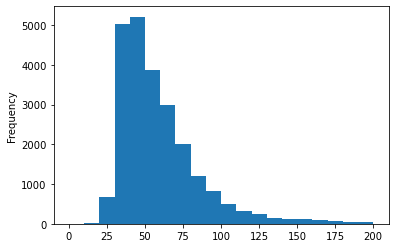

<AxesSubplot:ylabel='Frequency'>

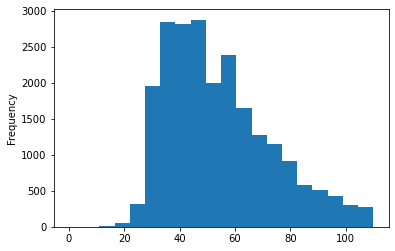

In [28]:
data['total_area'].plot(kind='hist', x='b', y='a',bins=20, range=(0,200))
plt.show()
data['total_area'].plot(kind='hist', label='filtered',bins=20, range=(0,110))
# гистограмма по общей площади

На основе построенной гистограммы можно сказать:
- площадь большинства квартир колеблется в районе 30-70м2
-  существует небольшое количество квартир площадь, которых существенно больше и доходит вплоть до 200м2

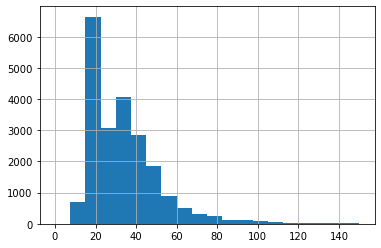

<AxesSubplot:>

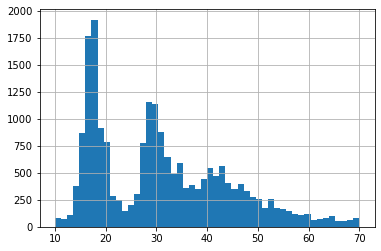

In [29]:
data['living_area'].hist(bins=20, range=(0,150))
plt.show()
data['living_area'].hist(bins=50, range=(10,70))
# гистограмма по жилой площади


На основе построенной гистограммы можно сказать:
- жилая площадь большинства квартир колеблется в районе 15-50м2
- существует небольшое количество квартир жилая площадь, которых существенно больше и доходит вплоть до 140м2
- на нижнем графике отчетливо видно два пика, в районе 15м2 и 30м2. Можно преположить, что эти пики связаны с числом комнат. Пик в районе 15м2 - однокомнатные квартиры, в районе 30м2 - двухкомнатные

<AxesSubplot:>

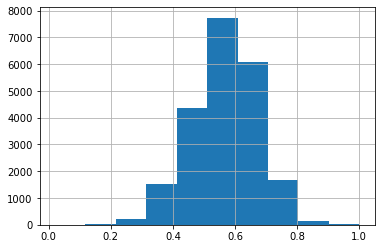

In [30]:
data['living_total_area'].hist(bins=10)
# гистограмма по соотношению жилой площади с общей

На основе построенной гистограммы можно сказать:
- жилая площадь большинства квартир колеблется в районе 40-70% от общей площади.

<AxesSubplot:>

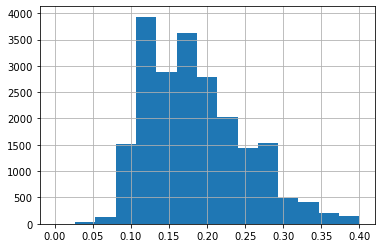

In [31]:
data['kitchen_total_area'].hist(bins=15, range=(0,0.4))
# гистограмма по соотношению  площади кухни с общей

На основе построенной гистограммы можно сказать:
- площадь кухни колеблется в основном районе 10-20% от общей площади.
- иногда кухня занимает  порядка 30-40%, но это бывает крайне редко.

#### 4.1.2 Изучение цены

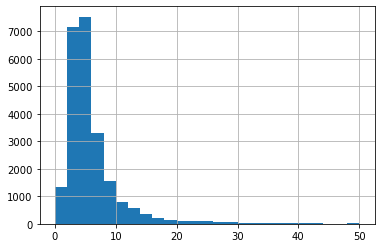

<AxesSubplot:>

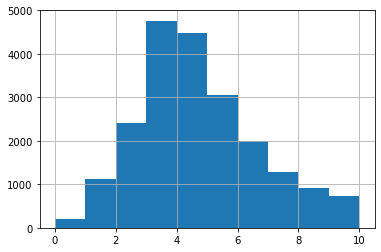

In [32]:
data['last_price'].hist(bins=25, range=(0,50))
plt.show()
data['last_price'].hist(bins=10, range=(0,10))
# гистограмма по цене

На основе построенной гистограммы можно сказать:
- цены на квартиры в основном не дороже 10млн.
- на некоторые квартиры цены доходят и до 40-50 млн, но таких квартир крайне мало.
- самая частая цена - в районе 3-6 млн.

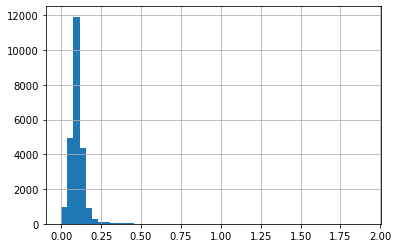

<AxesSubplot:>

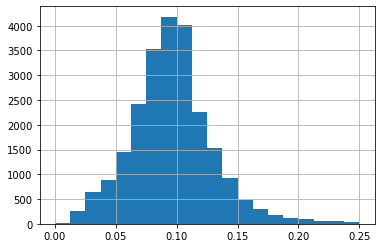

In [33]:
data['price_m2'].hist(bins=50)
plt.show()
data['price_m2'].hist(bins=20, range=(0,0.25))
# гистограмма по цене за м2

На основе построенной гистограммы можно сказать:
- цена за м2 в основном не больше 150 тыс.
- на некоторые квартиры цены за м2 доходят и до 250 и даже до 400 тыс, но таких квартир крайне мало.
- самая частая цена - в районе 50-150 тыс.

#### 4.1.3 Изучение высоты потолка

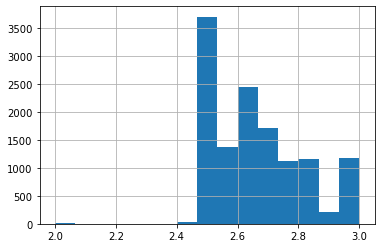

<AxesSubplot:>

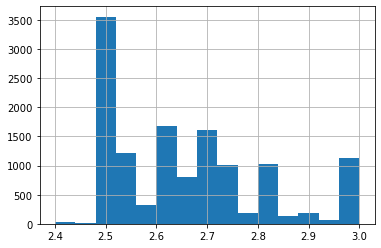

In [34]:
data['ceiling_height'].hist(bins=15, range=(2,3))
plt.show()
data['ceiling_height'].hist(bins=15, range=(2.4,3))
# гистограмма по высоте потолка

На основе построенной гистограммы можно сказать:
- высота варируется в пределах 2.5-3м.
- чаще всего высота потолков в квартирах около 2.5м .
- на графике выделяются сразу несколько пиков в районе 2.5, 2.6, 2.7, 2.8 и 3м.

#### 4.1.4 Изучение числа комнат

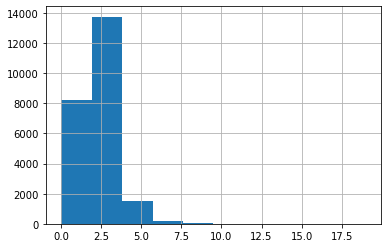

<AxesSubplot:>

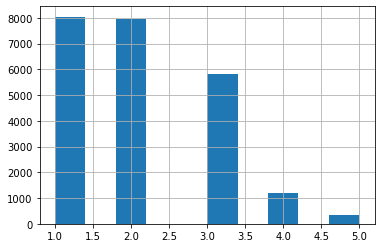

In [35]:
data['rooms'].hist(bins=10)
plt.show()
data['rooms'].hist(bins=10, range=(1,5))
# гистограмма по числу комнат

На основе построенной гистограммы можно сказать:
- высота варируется в пределах 2.5-3м.
- чаще всего встречаются однакомнтные, двукомнатные и трехкомнатные квартиры.
- однакомнтные и двукомнатные встречаются чаще всего.
- иногда число комнат доходит до 6-9.

### 4.2 Изучение времени продажи квартир

In [36]:
data['days_exposition'].describe()
# выводим основные метрики, чтобы посмотреть среднее и медиану

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

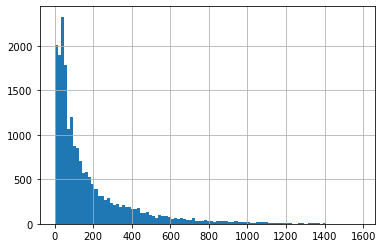

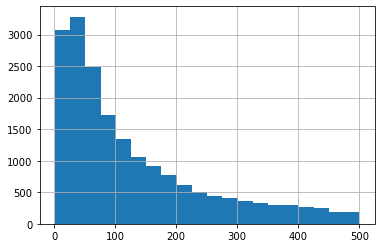

<AxesSubplot:>

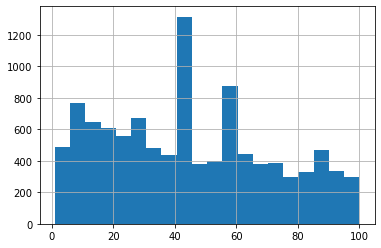

In [37]:
data['days_exposition'].hist(bins=100)
plt.show()
data['days_exposition'].hist(bins=20, range=(1,500))
plt.show()
data['days_exposition'].hist(bins=20, range=(1,100))
# гистограмма по времени продажи квартиры

На основе построенной гистограммы можно сказать:
- в течение 200 дней продается большая часть квартир. 
- Зачастую на продажу уходит не более 100 дней.
- Об этом же говорит и медиана, которая расположена на 95. Что означает, что ровно половина всех продаж происходит менее чем за 95 дней.
- так же видно большое количество выбросов, так, некоторые квартиры продаются более 1200 дней. Это же подтверждается большой разницей между средним (180) и медианой (95)
- На график за первые 100 дней продаж отчетиво видны два пика между 40-45 днями и в районе 55-60 дней. В эти промежутки продается наибольшее число квартир

(0.0, 600.0)

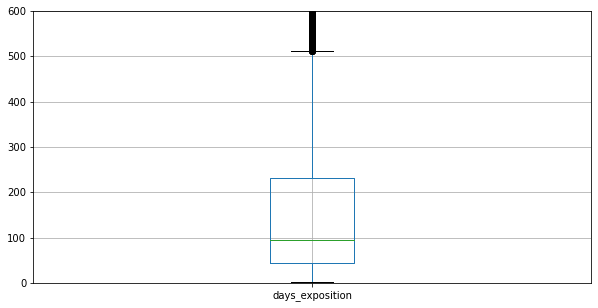

In [38]:
data.boxplot(['days_exposition'], figsize=(10,5))
plt.ylim(0, 600)
# диаграмма размаха

 На основе диаграммы рзмаха можно сказать следующее:
 - продажи, длящиеся более 500 дней, являются необычно долгими.
 - довольно быстрые продажи определить не представляется возможным, так как выбросов в меньшую сторону не наблюдается

### 4.3 Избавление от редких и выбивающихся значений. 

#### 4.3.1 Избавление от редких и выбивающихся значений в площади. 

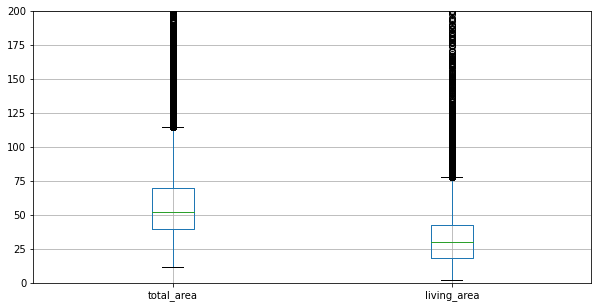

<AxesSubplot:>

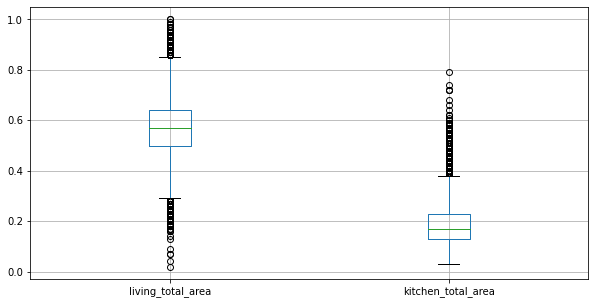

In [39]:
data.boxplot(['total_area', 'living_area'], figsize=(10,5))
plt.ylim(0, 200)
plt.show()
data.boxplot(['living_total_area','kitchen_total_area'], figsize=(10,5))
# диаграмма размаха

In [40]:
data_good = data.query(
    '(total_area < 123) & (living_area < 75) & (living_total_area < 0.9) & (kitchen_total_area < 0.39)')
# Избавление от редких и выбивающихся значений в площади

In [41]:
int(100 - (100 / data['total_images'].count()  * data_good['total_images'].count()))

17

Мы избавились от 17% данных

#### 4.3.2 Избавление от редких и выбивающихся значений в цене. 

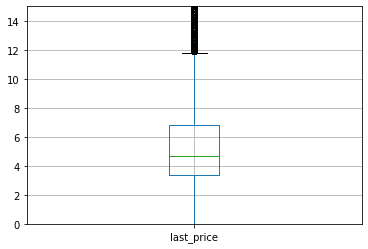

(0.0, 0.2)

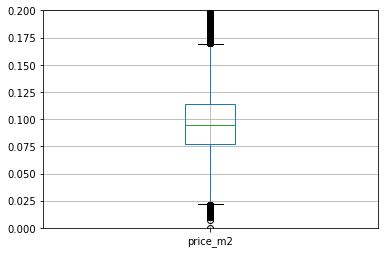

In [42]:
data.boxplot('last_price')
plt.ylim(0, 15)
plt.show()
data.boxplot('price_m2')
plt.ylim(0, 0.2)
# диаграмма размаха

In [43]:
data_good = data_good.query(
    '(last_price < 11.8) & (0.03 < price_m2 < 170)'
)
# Избавление от редких и выбивающихся значений в цене

#### 4.3.3 Избавление от редких и выбивающихся значений по высоте потолков. 

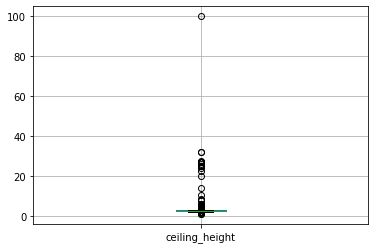

(1.0, 4.0)

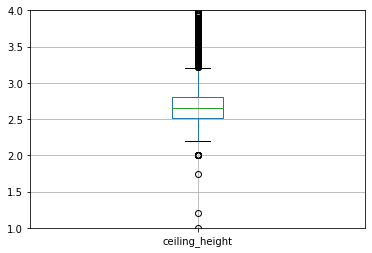

In [44]:
data.boxplot('ceiling_height')
plt.show()
data.boxplot('ceiling_height')
plt.ylim(1, 4)
# диаграмма размаха

In [45]:
data_good = data_good.query('ceiling_height < 3.3')
# Избавление от редких и выбивающихся значений в цене

#### 4.3.4 Избавление от редких и выбивающихся значений по дням продажи. 

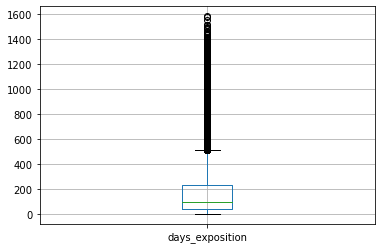

(0.0, 600.0)

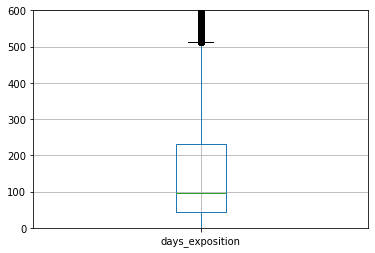

In [46]:
data.boxplot('days_exposition')
plt.show()
data.boxplot('days_exposition')
plt.ylim(0,600)
# диаграмма размаха

In [47]:
data_good = data_good.query('days_exposition < 505')
#Избавление от редких и выбивающихся значений по дням продажи.

In [48]:
data_good = data_good.reset_index(drop=True)
data_good
# обновление индекса

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3km,ponds_nearest,days_exposition,price_m2,day,month,year,floor_category,living_total_area,kitchen_total_area
0,18,5.4,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,0.0,NaN,289.0,0.089,6,2,2017,другой,0.71,0.11
1,5,5.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,2.0,553.0,137.0,0.126,3,11,2017,другой,0.51,0.21
2,20,3.5,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,3.0,298.0,366.0,0.082,5,7,2017,последний,0.63,0.12
3,11,6.7,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,...,0.0,NaN,397.0,0.082,3,11,2017,первый,0.68,0.11
4,8,3.2,31.0,2017-01-27,1,2.50,5.0,19.4,2,False,...,0.0,NaN,168.0,0.103,4,1,2017,другой,0.63,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8732,11,2.4,35.6,2016-06-23,1,2.50,5.0,17.0,4,False,...,0.0,NaN,40.0,0.067,3,6,2016,другой,0.48,0.23
8733,8,3.3,31.0,2017-04-29,1,2.55,9.0,18.0,6,False,...,1.0,317.0,193.0,0.106,5,4,2017,другой,0.58,0.21
8734,19,9.2,101.0,2019-04-01,3,3.05,15.0,63.0,12,False,...,0.0,NaN,23.0,0.091,0,4,2019,другой,0.62,0.15
8735,13,3.5,35.3,2018-02-28,1,2.86,15.0,16.3,4,False,...,2.0,652.0,29.0,0.099,2,2,2018,другой,0.46,0.26


### 4.4 Изучение зависимости цены от различных факторов. 

#### 4.4.1 Изучение зависимости цены от площади, числа комнат, удалённости от центра. 

In [49]:
factor = ['total_area','city_centers_nearest']
# список с факторами

In [50]:
def cor(factors, element, data):
    for a in factors:
        print(f'Корреляция {a} к {element} = {round(data[element].corr(data_good[a]), 2)}')
# создание функции для подсчета корреляции

In [51]:
cor(factors=factor, element='last_price', data=data_good)
# подсчет корреляции к общей цене

Корреляция total_area к last_price = 0.72
Корреляция city_centers_nearest к last_price = -0.32


In [52]:
cor(factor, 'price_m2', data_good)
# подсчет корреляции к цене за м2

Корреляция total_area к price_m2 = -0.11
Корреляция city_centers_nearest к price_m2 = -0.39


#### 4.4.2 Изучение зависимости цены  от того, на каком этаже расположена квартира.

In [53]:
c = []
for a in data_good['floor_category']:
    if a == 'первый':
        c.append(1)
    elif a == 'последний':
        c.append(2)
    else:
        c.append(3)
data_good['floor_category_int'] = c 
# создание столбца с условной цифровой категоризацией, для подсчета корреляции

In [54]:
for a in ['floor_category','rooms']:
    display(round(data_good.pivot_table(index=a,values='price_m2'), 2))

,price_m2
floor_category,
другой,0.10
первый,0.08
последний,0.09


,price_m2
rooms,
1,0.10
2,0.09
3,0.09
4,0.08
5,0.08


In [55]:
for a in ['day', 'month', 'year']:
    display(round(data_good.pivot_table(index=a,values='price_m2'), 2))

,price_m2
day,
0,0.09
1,0.09
2,0.09
3,0.09
4,0.09
5,0.09
6,0.09


,price_m2
month,
1,0.10
2,0.09
3,0.09
4,0.09
5,0.09
6,0.09
7,0.09
8,0.10
9,0.10


,price_m2
year,
2015,0.09
2016,0.09
2017,0.09
2018,0.09
2019,0.10


**Вывод**
Факторы можно условно разделить на три категории:

*Для общей цены*
1) Существенно влияющие
* общая площадь
* количество комнат (скорее всего также связана с площадью, как правило, чем больше комнат тем больше площадь)

2) Несущественно влияющие
* Растояние от центра

3) Не влияющие
* все остальные

*Для цены за м2*
1) Существенно влияющие
* нет

2) Несущественно влияющие
* Растояние от центра
* количесто комнат
* этаж

3) Не влияющие
* все остальные

## 4.5 Стоимость жилья в населенных пунктах с наибольшим числом объявлений. 

In [56]:
data_good_pivot_m2 = data_good.pivot_table(
    index='locality_name', values='price_m2',  aggfunc=['count','mean']
)
data_good_pivot_m2.columns = ['count','price_m2_mean']
data_good_pivot_m2



#группировка по населенному пункту с расчетом кол-ва объявлений и подсчетом средней цены за м2


,count,price_m2_mean
locality_name,,
Волосово,11,0.042182
Волхов,32,0.035937
Всеволожск,175,0.066143
Выборг,58,0.057172
Гатчина,96,0.070333
...,...,...
садовое товарищество Рахья,1,0.038000
село Копорье,2,0.051000
село Павлово,2,0.062000


In [57]:
data_top_10 =(data_good_pivot_m2
 .sort_values('count', ascending=False)
 .head(10)
)
data_top_10
#  создание нового датафрейма с 10ю пунктами, отсортироваными по кол-ву объявлений 

,count,price_m2_mean
locality_name,,
Санкт-Петербург,5985,0.104063
Всеволожск,175,0.066143
посёлок Шушары,165,0.078315
Колпино,157,0.074185
посёлок Мурино,148,0.087176
Пушкин,137,0.097664
посёлок Парголово,106,0.089774
Петергоф,102,0.082794
Гатчина,96,0.070333


In [58]:
data_top_10.query('price_m2_mean == price_m2_mean.max()')
#населенный пункт с самой высокой ценой за м2

,count,price_m2_mean
locality_name,,
Санкт-Петербург,5985,0.104063


In [59]:
data_top_10.query('price_m2_mean == price_m2_mean.min()')
#населенный пункт с самой низкой ценой за м2

,count,price_m2_mean
locality_name,,
Всеволожск,175,0.066143


**Вывод**

Населенный пункт с самой высокой ценой за м2 - Санкт-Петербург (104тыс)

Населенный пункт с самой низкой ценой за м2 - Всеволожск (66тыс)

## 4.6 Поиск границ центра. 

In [60]:
data_good['city_centers_nearest_km'] = data_good['city_centers_nearest'] //1000
data_good.head()
#перевод растояния в киллометры для удобства построения графика

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_m2,day,month,year,floor_category,living_total_area,kitchen_total_area,floor_category_int,city_centers_nearest_km
0,18,5.4,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,289.0,0.089,6,2,2017,другой,0.71,0.11,3,15.0
1,5,5.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,137.0,0.126,3,11,2017,другой,0.51,0.21,3,13.0
2,20,3.5,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,366.0,0.082,5,7,2017,последний,0.63,0.12,2,33.0
3,11,6.7,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,...,397.0,0.082,3,11,2017,первый,0.68,0.11,1,10.0
4,8,3.2,31.0,2017-01-27,1,2.50,5.0,19.4,2,False,...,168.0,0.103,4,1,2017,другой,0.63,0.18,3,10.0


In [61]:
data_piter = data_good.query('locality_name == "Санкт-Петербург" ')
# выделение квартир в Питере в отдельный датафрейм

<AxesSubplot:xlabel='city_centers_nearest_km'>

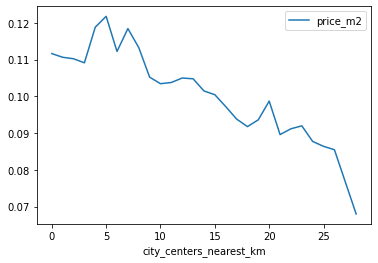

In [62]:
(data_piter
 .pivot_table(index='city_centers_nearest_km', values='price_m2')
 .plot()
)
#построение графика

**Вывод**

На основании данного графика можно сказать, чтов центр входит область в пределах 8ми км.

## 4.7 Анализ центра и сравнение со всей территорией. 

In [63]:
data_piter_center = data_piter.query('city_centers_nearest_km <= 8')
data_piter_center = data_piter_center.reset_index(drop=True)
#создание нового датафрейма с информацией только по квартирам из центра

In [64]:
data_piter_center['city_centers_nearest_km'].head()
# проверка

0    7.0
1    6.0
2    4.0
3    8.0
4    7.0
Name: city_centers_nearest_km, dtype: float64

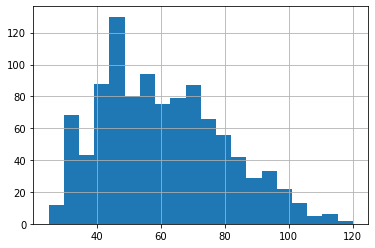

<AxesSubplot:>

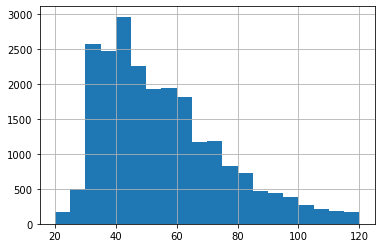

In [65]:
data_piter_center['total_area'].hist(bins=20, range=(25,120))
plt.show()
data['total_area'].hist(bins=20, range=(20,120))
# гистограммы по общей площади квартир в центре и в целом

На основании построенных гистограмм можно сказать:
- график с квартирами в центре больше смещен вправо, то есть квартир с площадью 70-80 м2 в центре столько же сколько площадью 40-60.   
- на обоих графиках есть пик в районе 45 м2
- на графике с кв в центре есть пик в районе 30-35м2, которого нет на общем графике, следовательно в центре больше (в процентном соотношении) маленьких квартир

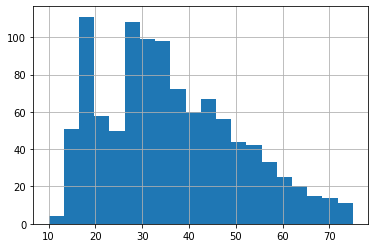

<AxesSubplot:>

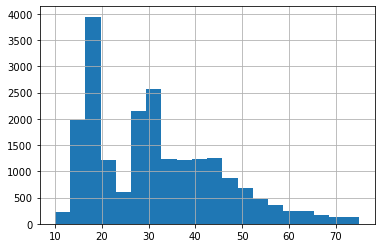

In [66]:
data_piter_center['living_area'].hist(bins=20, range=(10,75))
plt.show()
data['living_area'].hist(bins=20, range=(10,75))
# гистограммы по жилой площади квартир в центре и в целом

На основании построенных гистограмм можно сказать:
- графики практически идентичны с пиками и провалами в одних и тех же местах, следовательно по данномму параметру центр не отличается от всех остальных квартир.

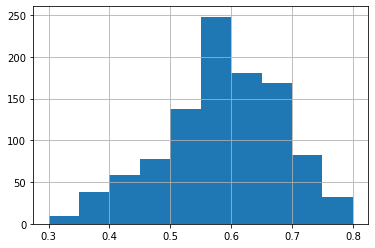

<AxesSubplot:>

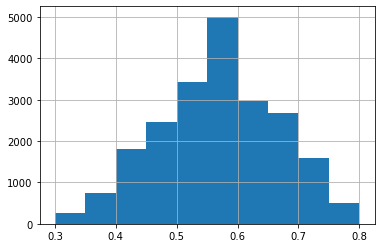

In [67]:
data_piter_center['living_total_area'].hist(bins=10, range=(0.3,0.8))
plt.show()
data['living_total_area'].hist(bins=10,range=(0.3,0.8))
# гистограммы по соотношению общей площади к жилой у квартир в центре и в целом

На основании построенных гистограмм можно сказать:
- графики практически идентичны с пиком  в одном и тм же месте (в районе 55-60%), следовательно по данномму параметру центр не отличается от всех остальных квартир.

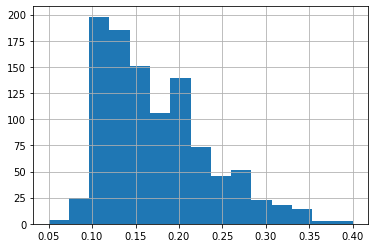

<AxesSubplot:>

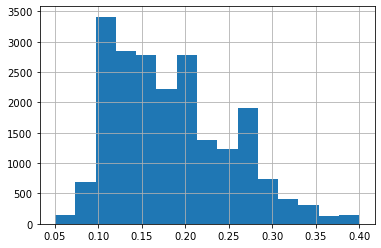

In [68]:
data_piter_center['kitchen_total_area'].hist(bins=15, range=(0.05,0.4))
plt.show()
data['kitchen_total_area'].hist(bins=15, range=(0.05,0.4))
# гистограммы по соотношению общей площади к площади кухни у квартир в центре и в целом

На основании построенных гистограмм можно сказать:
- графики практически идентичны с пиками и провалами в одних и тех же местах, следовательно по данномму параметру центр не отличается от всех остальных квартир.

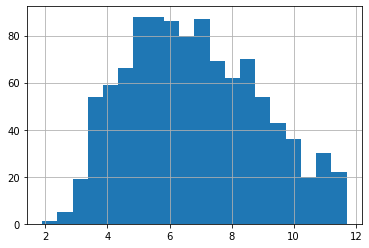

<AxesSubplot:>

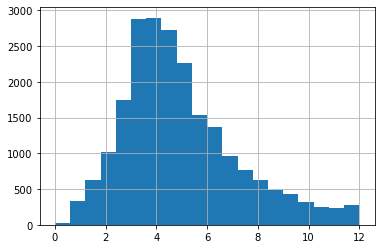

In [69]:
data_piter_center['last_price'].hist(bins=20)
plt.show()
data['last_price'].hist(bins=20, range=(0,12))
# гистограммы по цене квартир в центре и в целом

На основании построенных гистограмм можно сказать:
- график с квартирами в центре больше смещен вправо, то есть квартиры здесь явно дороже.
- если в датафрейме со всеми квартирами стоимость большинства квартир была около 3-6млн, то в центре цена варируется у большинства кварир в пределах 4-9млн.
- в центре нет квартир дороже 12 млн, а график по всем квартирам показывал, что некоторые значения доходят вплоть до 50млн. Это значит, что самые дорогие квартиры находятся не в центре

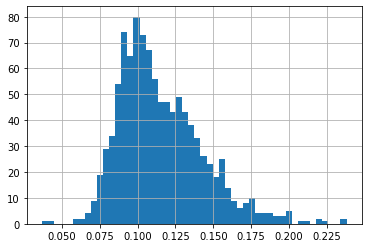

<AxesSubplot:>

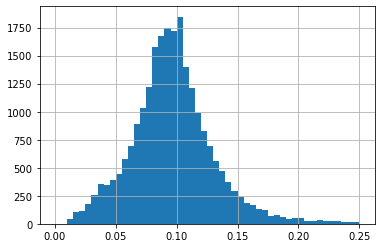

In [70]:
data_piter_center['price_m2'].hist(bins=50)
plt.show()
data['price_m2'].hist(bins=50, range=(0,0.25))
# гистограммы по цене квартир за м2 в центре и в целом

На основании построенных гистограмм можно сказать:
- цена за м2 в центре существенно выше, чем в целом по всем квартирам. 
- цена за м2 для большинства квартир в центре колеблется в районе 75-150тыс
- цена за м2 для большинства квартир в целом колеблется в районе 40-140тыс
- квартиры с ценой в 200тыс за м2 и выше встречаются на обоих графиках, но в центре реже

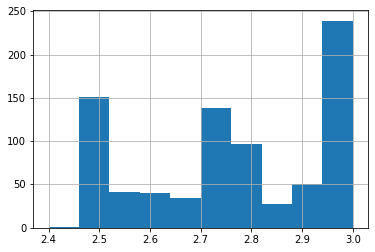

<AxesSubplot:>

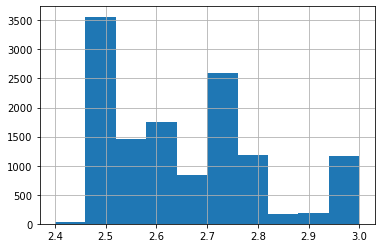

In [71]:
data_piter_center['ceiling_height'].hist(bins=10, range=(2.4,3))#, range=(0,150))
plt.show()
data['ceiling_height'].hist(bins=10, range=(2.4,3))#, range=(0,150))
# гистограммы по высоте потолков квартир в центре и в целом

На основании построенных гистограмм можно сказать:
- пики на графиках находятся у одних и тех же значений, однако они отличаются друг от друга
- в центре города чаще всего встречаются квартиры с высокими потолками, в районе 3м, а квартир с низкими потолками в 2.5м значительно меньше
- в целом по квартирам чаще встречаются наоборот низкие потолки в 2.5 м авысокие встречаются сильно реже

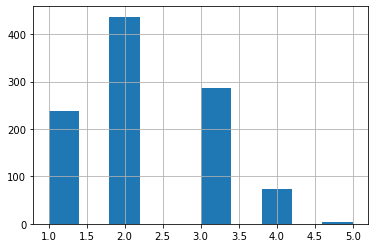

<AxesSubplot:>

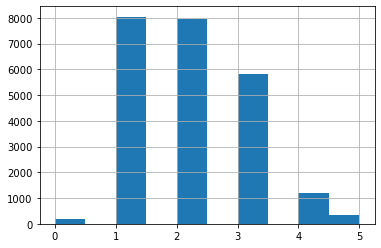

In [72]:
data_piter_center['rooms'].hist(bins=10)
plt.show()
data['rooms'].hist(bins=10, range=(0,5))
# гистограммы по кол-ву комнат  в квартирах в центре и в целом

На основании построенных гистограмм можно сказать:
- в центре однушек меньше, чем двукомнатных и даже трехкомнатных, в то время ка в целом однушек столько же сколько и двукомнатных.
- в центре практически нет  пятикомнатных квартир, и вообще нет квартир с большем количеством комнат, вто время как в целом, количество комнат иногда доходит и до 8.

In [73]:
factor = ['city_centers_nearest']

In [74]:
cor(factors=factor, element='price_m2', data=data_piter_center)
print()
print()
cor(factors=factor, element='price_m2', data=data_good)

Корреляция city_centers_nearest к price_m2 = 0.02


Корреляция city_centers_nearest к price_m2 = -0.39


In [75]:
for a in ['day', 'month', 'year','floor_category','rooms']:
    display(round(data_good.pivot_table(index=a,values='price_m2'), 2))

,price_m2
day,
0,0.09
1,0.09
2,0.09
3,0.09
4,0.09
5,0.09
6,0.09


,price_m2
month,
1,0.10
2,0.09
3,0.09
4,0.09
5,0.09
6,0.09
7,0.09
8,0.10
9,0.10


,price_m2
year,
2015,0.09
2016,0.09
2017,0.09
2018,0.09
2019,0.10


,price_m2
floor_category,
другой,0.10
первый,0.08
последний,0.09


,price_m2
rooms,
1,0.10
2,0.09
3,0.09
4,0.08
5,0.08


**Вывод**

По корреляции видно, что ни один из данных факторов не влияет на стоимость м2 в центре.

Это немного отличается от ообщей картины, так как по общим данным на цену влияет число комнат и растояние от центра

## 5 Вывод

Исследование проходило в несколько этапов:

1) Обзор данных

2) Предобратока данных

В ходе предобратки:

- исправлен формат времени,
- исправлен формат запмси цены,
- дубликаты не обнаружены.
- заполнены некоторые пропуски
- исправлены названия столбцов

3) Добавление столбцов

На этом этапе были добавлены следующие столбцы:
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.


4) Исследовательский анализ данных

На данном этапе были:
- изучены различные параметры ( площадь, цена, число комнат, высота потолков).
- очищены данные от выбивающихся значений.
- проанализировано влиянияние данных параметров на цену квартир, в целом по данным и кокретно в Санкт-Петербурге.
- выявлены топ 10 населенных пунктов с наибольшим количеством объявлений.